In [ ]:
Ex.1: Understanding Data Visualization
✅ Task 1: Why is data visualization important in data analysis?
Answer:

Data visualization is important because it helps us understand and interpret data more easily. 
Instead of looking at raw numbers in a table, we can see patterns, trends, and outliers quickly through charts and graphs. 
Visualization also helps communicate insights to others, especially when they are not data experts.

In short:

It simplifies complex data.
Helps to identify trends and patterns.
Makes it easier to spot problems or outliers.
Allows for clear communication of results.

✅ Task 2: What is the purpose of a line graph in data visualization?
Answer:

A line graph shows how something changes over time or across a continuous scale. 
It connects data points with lines, which makes it easy to see trends, increases, decreases, or fluctuations.

Use a line graph when:

You have time-series data (e.g., days, months, years).
You want to show how values increase or decrease over time.
You are tracking progress, growth, or change.



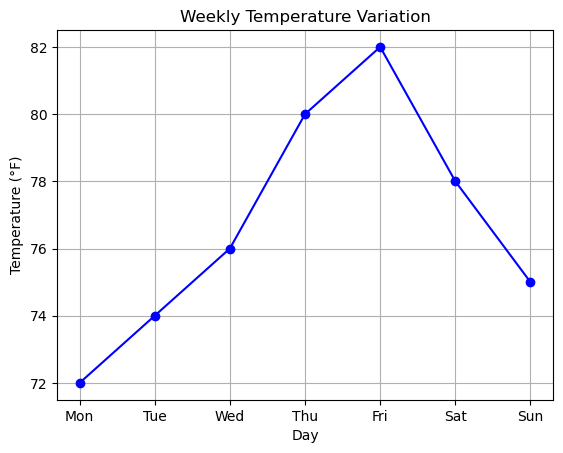

In [1]:
#Ex.2
import matplotlib.pyplot as plt

# Данные
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
temperatures = [72, 74, 76, 80, 82, 78, 75]

# Построение графика
plt.plot(days, temperatures, marker='o', linestyle='-', color='blue')

# Добавление подписей и заголовка
plt.xlabel("Day")
plt.ylabel("Temperature (°F)")
plt.title("Weekly Temperature Variation")
plt.grid(True)

# Отображение графика
plt.show()


In [8]:
#Ex.3
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# 1. Загрузка датасета
df = pd.read_csv('train.csv')

# 2. Создание признака "FamilySize"
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 3. Извлечение "Title" из "Name"
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Можно объединить редкие титулы:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 
                                   'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# 4. Кодирование категориальных признаков

# Label encoding for 'Sex'
le_sex = LabelEncoder()
df['Sex_encoded'] = le_sex.fit_transform(df['Sex'])

# One-hot encoding for 'Embarked' and 'Title'
df = pd.get_dummies(df, columns=['Embarked', 'Title'], prefix=['Embarked', 'Title'])

# 5. Нормализация числовых признаков
scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# 6. Проверим результат
print(df[['Sex', 'Sex_encoded', 'FamilySize'] + [col for col in df.columns if col.startswith('Embarked_') or col.startswith('Title_')]].head())


      Sex  Sex_encoded  FamilySize  Embarked_C  Embarked_Q  Embarked_S  \
0    male            1           2       False       False        True   
1  female            0           2        True       False       False   
2  female            0           1       False       False        True   
3  female            0           2       False       False        True   
4    male            1           1       False       False        True   

   Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_Rare  
0         False       False      True      False       False  
1         False       False     False       True       False  
2         False        True     False      False       False  
3         False       False     False       True       False  
4         False       False      True      False       False  


Столбцы в датасете: Index(['College ID', 'Country', 'Total Students', 'Male', 'Female', 'CGPA',
       'Annual Family Income', 'Branch', 'Sports', 'Research Papers Published',
       'Placement Rate', 'Faculty Count'],
      dtype='object')


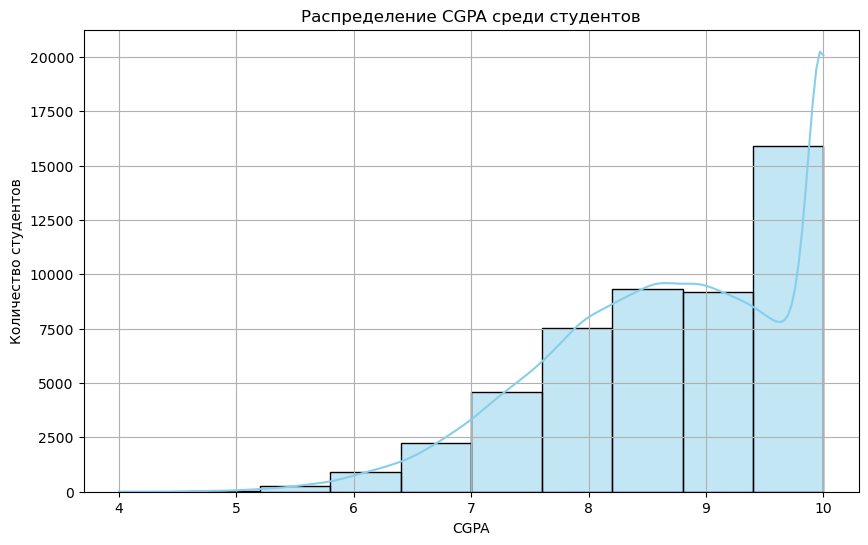

In [10]:
#Ex.4

# Импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Установка текущей рабочей директории
working_dir = r"C:\DI-Bootcamp\Week3\Day4\ExcerciseXP"

# Загрузка данных (предполагается, что файл находится в той же папке)
file_path = "College Data.csv"
df = pd.read_csv(file_path)

# Проверим названия столбцов, чтобы точно указать нужный
print("Столбцы в датасете:", df.columns)

# Предположим, что столбец называется 'CGPA' (если не так — скорректируй ниже)
# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='CGPA', bins=10, color='skyblue', kde=True)

# Оформление графика
plt.title('Распределение CGPA среди студентов')
plt.xlabel('CGPA')
plt.ylabel('Количество студентов')
plt.grid(True)
plt.show()


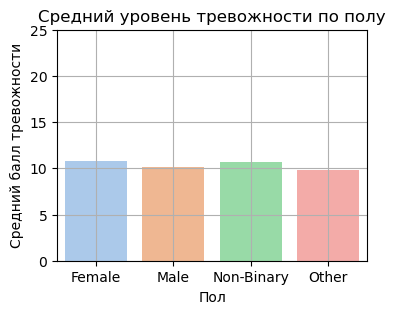

In [22]:
# Ex.5

# Импорт библиотек
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Установка рабочей директории
working_dir = r"C:\DI-Bootcamp\Week3\Day4\ExerciseXP"
os.chdir(working_dir)

# Загрузка данных
df = pd.read_csv("anxiety_depression_data.csv")


# Группировка по полу и вычисление среднего уровня тревожности
anxiety_by_gender = df.groupby('Gender')['Anxiety_Score'].mean().reset_index()

# Построение графика
plt.figure(figsize=(4, 3))
sns.barplot(data=anxiety_by_gender, x='Gender', y='Anxiety_Score', hue='Gender', palette='pastel', legend=False)

# Оформление
plt.title('Средний уровень тревожности по полу')
plt.xlabel('Пол')
plt.ylabel('Средний балл тревожности')
plt.ylim(0, df['Anxiety_Score'].max() + 5)
plt.grid(True)
plt.show()

Названия столбцов: Index(['Age', 'Gender', 'Education_Level', 'Employment_Status', 'Sleep_Hours',
       'Physical_Activity_Hrs', 'Social_Support_Score', 'Anxiety_Score',
       'Depression_Score', 'Stress_Level', 'Family_History_Mental_Illness',
       'Chronic_Illnesses', 'Medication_Use', 'Therapy', 'Meditation',
       'Substance_Use', 'Financial_Stress', 'Work_Stress', 'Self_Esteem_Score',
       'Life_Satisfaction_Score', 'Loneliness_Score'],
      dtype='object')


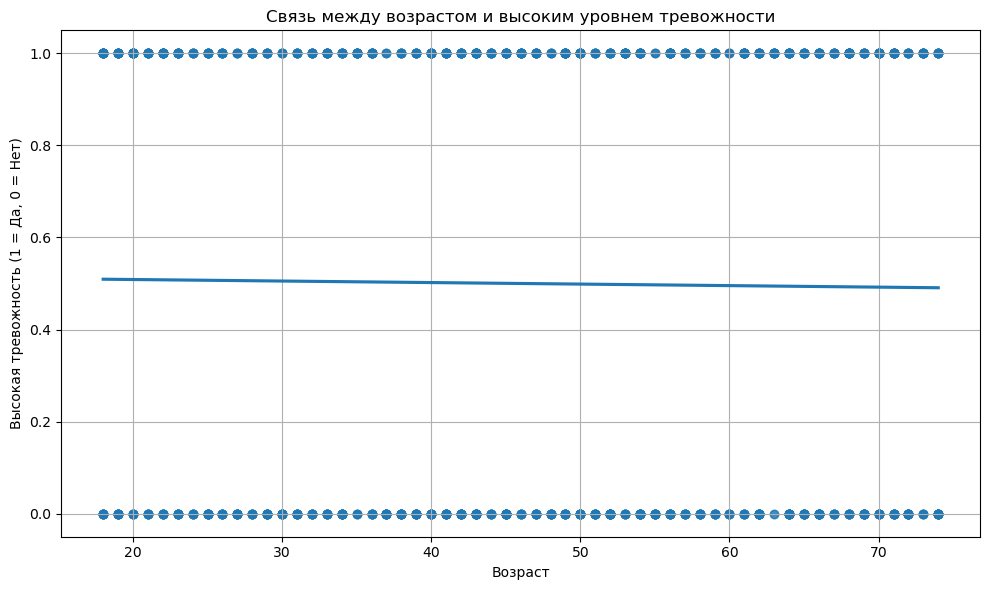

In [24]:
#Ex.6
# Импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Установка рабочей директории (если нужно)
os.chdir(r"C:\DI-Bootcamp\Week3\Day4\ExerciseXP")

# Загрузка данных
file_path = "anxiety_depression_data.csv"
df = pd.read_csv(file_path)

# Проверим, есть ли нужный столбец
print("Названия столбцов:", df.columns)

# Преобразуем значения панических атак в числовой формат (используем Anxiety_Score > порога)
threshold = df['Anxiety_Score'].median()  # Например, медиана как порог

df['High_Anxiety'] = (df['Anxiety_Score'] > threshold).astype(int)

# Построение scatter plot с линией регрессии
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Age', y='High_Anxiety', logistic=True, ci=None, scatter_kws={'alpha':0.6})

# Оформление графика
plt.title('Связь между возрастом и высоким уровнем тревожности')
plt.xlabel('Возраст')
plt.ylabel('Высокая тревожность (1 = Да, 0 = Нет)')
plt.grid(True)
plt.tight_layout()
plt.show()
